In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
base_path = '/Users/kelly.li/stocks/china/tushare/'
def get_daily(ts_code):
    return pd.read_csv(base_path + 'daily/%s.csv' % str(ts_code[0:6]))
def get_basic_stock():
    return pd.read_csv(base_path + 'stock_basic.csv')
def get_roe():
    return pd.read_csv(base_path + 'roe-2020-01-12.csv')

In [3]:
stock = get_daily('600276.SH')
stock.rename(columns={'trade_date': 'date', 'vol': 'volume'}, inplace=True)
stock['date'] = pd.to_datetime(stock['date'], format='%Y%m%d')
stock['date_ym'] = stock['date'].map(lambda x: x.strftime('%Y-%m'))
stock.loc[stock.pct_chg > 9, :].groupby('date_ym').agg({'pct_chg': 'count'}).sort_index()


,pct_chg
date_ym,
2006-04,1
2006-05,2
2006-09,1
2007-01,1
2007-02,1
2007-05,2
2007-06,1
2008-04,1
2008-09,1


In [4]:
basic_stock = get_basic_stock()

In [5]:
basic_stock.head()

,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,1,平安银行,深圳,银行,19910403
1,000002.SZ,2,万科A,深圳,全国地产,19910129
2,000004.SZ,4,国农科技,深圳,生物制药,19910114
3,000005.SZ,5,世纪星源,深圳,环境保护,19901210
4,000006.SZ,6,深振业A,深圳,区域地产,19920427


In [6]:
all_stock = pd.DataFrame()
for ts_code in  basic_stock.loc[basic_stock.industry=='银行','ts_code']:
    stock = get_daily(ts_code)
    #print(ts_code)
    stock.rename(columns={'trade_date': 'date', 'vol': 'volume'}, inplace=True)
    stock['date'] = pd.to_datetime(stock['date'], format='%Y%m%d')
    stock['date_y'] = stock['date'].map(lambda x: x.strftime('%Y'))
    stock['date_ym'] = stock['date'].map(lambda x: x.strftime('%Y-%m'))
    stock = stock.loc[(stock.pct_chg > 5)&(stock.date_y>'2010'),['ts_code','pct_chg','date','date_y','date_ym']]
    all_stock = all_stock.append(stock)
#     stock.loc[stock.pct_chg > 9, :].groupby('date_ym').agg({'pct_chg': 'count'}).sort_index()
all_stock.head()    

,ts_code,pct_chg,date,date_y,date_ym
1901,000001.SZ,5.8028,2011-04-13,2011,2011-04
1989,000001.SZ,5.7970,2011-08-25,2011,2011-08
2077,000001.SZ,6.3371,2012-01-20,2012,2012-01
2287,000001.SZ,5.4348,2012-12-05,2012,2012-12
2294,000001.SZ,7.9656,2012-12-14,2012,2012-12


In [7]:
sz_pct_9 = all_stock.groupby(['ts_code','date_y']).agg({'pct_chg': 'count'}).unstack()

In [8]:
sz_pct_9 = pd.merge(basic_stock[['ts_code','name','industry']],sz_pct_9.reset_index(),on='ts_code')


/Users/kelly.li/anaconda2/lib/python2.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/Users/kelly.li/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [9]:
sz_pct_9['mean'] = sz_pct_9.mean(axis=1)
sz_pct_9 = sz_pct_9.sort_values('mean',ascending=False)
sz_pct_9.head(50)

,ts_code,name,industry,"(pct_chg, 2011)","(pct_chg, 2012)","(pct_chg, 2013)","(pct_chg, 2014)","(pct_chg, 2015)","(pct_chg, 2016)","(pct_chg, 2017)","(pct_chg, 2018)","(pct_chg, 2019)",mean
28,601860.SH,紫金银行,银行,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.000000
15,600928.SH,西安银行,银行,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.000000
6,002958.SZ,青农商行,银行,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,15.000000
3,002839.SZ,张家港行,银行,NaN,NaN,NaN,NaN,NaN,NaN,28.0,9.0,3.0,13.333333
5,002948.SZ,青岛银行,银行,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.000000
2,002807.SZ,江阴银行,银行,NaN,NaN,NaN,NaN,NaN,11.0,20.0,5.0,2.0,9.500000
12,600908.SH,无锡银行,银行,NaN,NaN,NaN,NaN,NaN,11.0,16.0,5.0,3.0,8.750000
33,603323.SH,苏农银行,银行,NaN,NaN,NaN,NaN,NaN,8.0,13.0,6.0,4.0,7.750000
18,601128.SH,常熟银行,银行,NaN,NaN,NaN,NaN,NaN,11.0,10.0,4.0,6.0,7.750000
0,000001.SZ,平安银行,银行,2.0,3.0,16.0,8.0,13.0,NaN,4.0,2.0,5.0,6.625000


In [39]:
roe= get_roe()
roe.columns = ['ts_code','name','price','pct','roe_2019_3','roe_2019_2','roe_2019_1','roe_2018','roe_2017','roe_2016','roe_2015','roe_2021','roe_2020','roe_2019_4','np_2019_9','na_2019_9','ths_industry','pe_2010_1']



In [57]:
roe_clean = roe[['ts_code','name','ths_industry','roe_2015','roe_2016','roe_2017','roe_2018','roe_2019_1','roe_2019_2','roe_2019_3','roe_2019_4','roe_2020','roe_2021']]
roe_clean.head(5)


,ts_code,name,ths_industry,roe_2015,roe_2016,roe_2017,roe_2018,roe_2019_1,roe_2019_2,roe_2019_3,roe_2019_4,roe_2020,roe_2021
0,600083.SH,博信股份,综合-综合-综合Ⅲ,25.11,5.65,14.05,-137.90,115.02,100.48,75.44,--,--,--
1,002234.SZ,民和股份,农林牧渔-养殖业-畜禽养殖,-30.50,16.13,-32.82,40.92,29.37,55.87,71.70,62.50,36.34,21.12
2,600768.SH,宁波富邦,有色金属-有色冶炼加工-铝,-72.83,33.16,70.86,-26.00,-5.69,71.05,68.47,--,--,--
3,000526.SZ,紫光学大,信息服务-传媒-其他传媒,-9.06,-103.41,41.11,16.76,3.05,73.10,56.00,--,--,--
4,600132.SH,重庆啤酒,食品饮料-饮料制造-啤酒,-5.47,15.37,28.29,36.00,7.21,19.90,46.77,44.07,39.02,41.46


In [58]:
roe_clean = pd.merge(roe_clean,basic_stock[['ts_code','industry']],on='ts_code')
roe_clean.head(5)

,ts_code,name,ths_industry,roe_2015,roe_2016,roe_2017,roe_2018,roe_2019_1,roe_2019_2,roe_2019_3,roe_2019_4,roe_2020,roe_2021,industry
0,600083.SH,博信股份,综合-综合-综合Ⅲ,25.11,5.65,14.05,-137.90,115.02,100.48,75.44,--,--,--,综合类
1,002234.SZ,民和股份,农林牧渔-养殖业-畜禽养殖,-30.50,16.13,-32.82,40.92,29.37,55.87,71.70,62.50,36.34,21.12,农业综合
2,600768.SH,宁波富邦,有色金属-有色冶炼加工-铝,-72.83,33.16,70.86,-26.00,-5.69,71.05,68.47,--,--,--,铝
3,000526.SZ,紫光学大,信息服务-传媒-其他传媒,-9.06,-103.41,41.11,16.76,3.05,73.10,56.00,--,--,--,文教休闲
4,600132.SH,重庆啤酒,食品饮料-饮料制造-啤酒,-5.47,15.37,28.29,36.00,7.21,19.90,46.77,44.07,39.02,41.46,啤酒


In [46]:
roe_clean.loc[roe_clean.industry=='白酒',:]

,ts_code,name,ths_industry,roe_2021,roe_2020,roe_2019_4,roe_2019_3,roe_2019_2,roe_2019_1,roe_2018,roe_2017,roe_2016,roe_2015,industry
23,600779.SH,水井坊,食品饮料-饮料制造-白酒,36.72,36.25,34.81,32.13,16.76,11.12,33.72,22.55,16.29,7.11,白酒
52,600519.SH,贵州茅台,食品饮料-饮料制造-白酒,30.14,31.37,32.48,24.92,16.21,9.47,34.46,32.95,24.44,26.23,白酒
55,600809.SH,山西汾酒,食品饮料-饮料制造-白酒,26.93,26.96,26.09,24.68,17.35,12.68,25.08,19.04,13.24,12.52,白酒
108,000596.SZ,古井贡酒,食品饮料-饮料制造-白酒,24.32,24.50,24.15,21.18,16.71,9.80,24.03,19.09,15.88,15.91,白酒
115,000568.SZ,泸州老窖,食品饮料-饮料制造-白酒,27.60,26.54,24.84,20.66,14.98,8.53,21.81,20.30,17.79,14.74,白酒
123,002304.SZ,洋河股份,食品饮料-饮料制造-白酒,22.24,22.13,22.25,20.20,15.53,11.28,25.95,24.08,24.01,25.37,白酒
124,603589.SH,口子窖,食品饮料-饮料制造-白酒,23.39,24.29,25.10,20.20,13.84,8.46,27.42,24.00,19.81,20.55,白酒
138,603369.SH,今世缘,食品饮料-饮料制造-白酒,21.47,21.22,20.19,19.73,16.34,10.00,20.36,18.11,17.60,18.16,白酒
158,000858.SZ,五粮液,食品饮料-饮料制造-白酒,36.78,41.41,34.00,18.57,13.70,9.70,22.80,19.38,15.01,14.93,白酒
393,603198.SH,迎驾贡酒,食品饮料-饮料制造-白酒,17.53,18.23,18.77,13.49,9.75,7.83,18.42,16.90,17.84,16.42,白酒


In [119]:
a = roe_clean.loc[roe_clean.industry=='元器件',['name','roe_2015','roe_2016','roe_2017','roe_2018','roe_2019_4']]
a = a.replace('--',np.nan)
a[['roe_2015','roe_2016','roe_2017','roe_2018','roe_2019_4']] = a[['roe_2015','roe_2016','roe_2017','roe_2018','roe_2019_4']].astype(float)
a = a.sort_values(by='roe_2019_4',ascending=False)
a

,name,roe_2015,roe_2016,roe_2017,roe_2018,roe_2019_4
13,卓胜微,120.88,100.05,74.75,41.32,36.98
14,汇顶科技,35.52,47.13,28.79,19.72,36.87
17,视源股份,54.65,74.94,31.46,34.10,33.62
1052,隆利科技,23.03,55.18,41.76,40.76,30.30
104,深南电路,12.15,18.48,25.61,20.38,24.54
142,沪电股份,0.17,3.96,5.97,15.34,23.51
186,盈趣科技,50.88,72.25,80.97,24.72,22.08
126,飞荣达,25.38,23.20,12.13,15.43,21.56
204,立讯精密,21.02,16.09,14.09,17.95,21.20
147,弘信电子,8.26,10.04,12.85,21.25,20.91


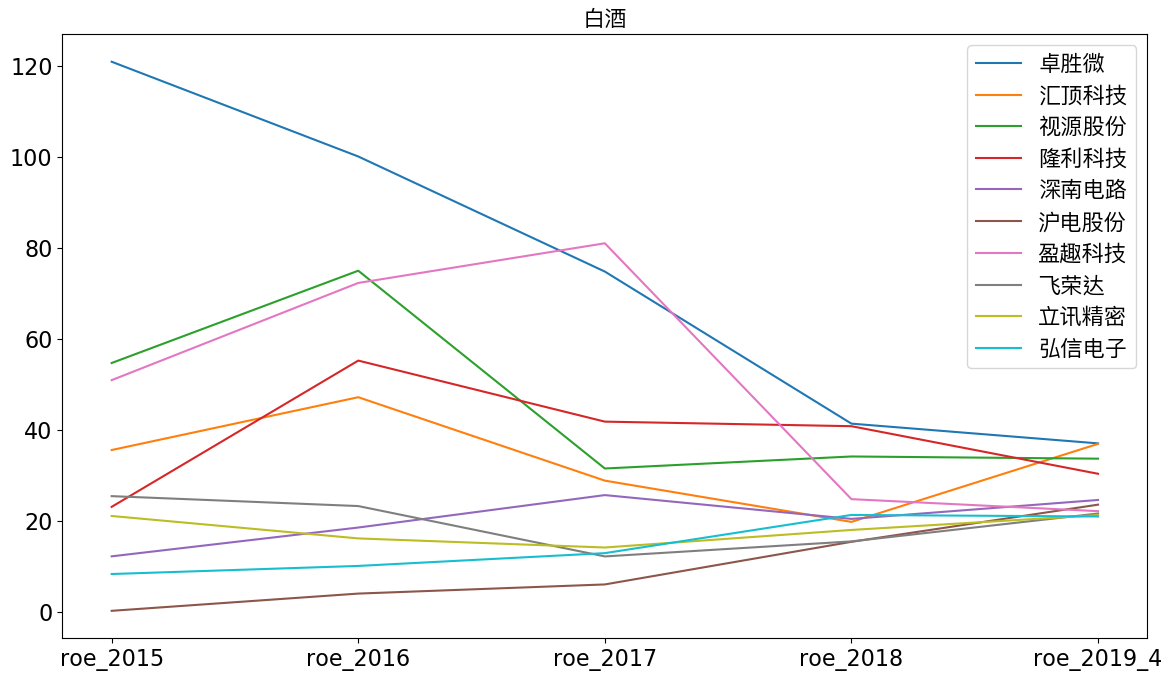

In [118]:
from matplotlib.font_manager import FontProperties
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
large = 22;
med = 16;
small = 12;
font = FontProperties(fname='/System/Library/Fonts/PingFang.ttc', size=med)
params = {
    'figure.figsize': (14, 8),  # 图像的画布大小

    'figure.titlesize': large,  # 整个画布的标题字体大小
    'axes.titlesize': large,  # 子图上的标题字体大小
    'legend.fontsize': med,  # 图例的字体大小
    'axes.labelsize': med,  # 标签的字体大小
    'xtick.labelsize': med,  # x轴上的标尺的字体大小
    'ytick.labelsize': med,  # y轴上的标尺的字体大小

    # 'font.family': ['sans-serif'],
    'font.sans-serif': ['Microsoft YaHei'],  # 字体
    'axes.unicode_minus': False,  # 显示负号

    'figure.facecolor': 'white',  # 前景色
    'figure.edgecolor': 'white',  # 边框色
    'figure.dpi': 100  # 分辨率
}
plt.rcParams.update(params)
b=a.head(10)
for i in range(10):
    plt.plot(b.iloc[i,1:],label=b.iloc[i,0])
plt.legend(prop=font)
plt.title(u'白酒',fontproperties=font)

In [78]:
import matplotlib
matplotlib.matplotlib_fname() 

'/Users/kelly.li/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [79]:
import sys 
sys.version

'2.7.15 |Anaconda, Inc.| (default, Nov 13 2018, 17:07:45) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [80]:
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])  
  
for i in a:  
    print i  

.Keyboard
.LastResort
Adobe Arabic
Adobe Arabic
Adobe Arabic
Adobe Arabic
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Devanagari
Adobe Devanagari
Adobe Devanagari
Adobe Devanagari
Adobe Fan Heiti Std
Adobe Fangsong Std
Adobe Garamond Pro
Adobe Garamond Pro
Adobe Garamond Pro
Adobe Garamond Pro
Adobe Gothic Std
Adobe Hebrew
Adobe Hebrew
Adobe Hebrew
Adobe Hebrew
Adobe Heiti Std
Adobe Kaiti Std
Adobe Ming Std
Adobe Myungjo Std
Adobe Naskh
Adobe Song Std
Andale Mono
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
AppleGothic
AppleMyungjo
Arial
Arial
Arial
Arial
Arial Black
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Ayuthaya
Big Caslon
Birch Std
Blackoak Std
Bodoni 72 Smallcaps
Bodoni Ornaments
Bradley Hand
Brush Script MT
Brush Script Std
Chalkduster
Chaparral Pro
Chaparral Pro
Chaparral Pro
Chaparral Pro
Chaparral Pro
Charlemagne Std
Comic S